# Análisis de la Correlación entre el S&P 500 y el VIX

Este Jupyter Notebook tiene como objetivo explorar la **correlación entre el índice S&P 500 y el índice VIX**. Para ello, analizaremos un conjunto de datos que incluye información diaria del S&P 500 desde el 1 de enero de 2005 hasta el 18 de julio de 2025.

---

## Datos a Utilizar

El dataset del S&P 500 contiene las siguientes columnas:

* **date**: Fecha de la observación.
* **open**: Precio de apertura.
* **high**: Precio máximo.
* **low**: Precio mínimo.
* **close**: Precio de cierre.
* **volume**: Volumen de negociación.
* **sp_pct_move**: Porcentaje de cambio diario del S&P 500.

Además de los datos del S&P 500, incorporaremos los mismos datos para el **índice VIX**, conocido como el "índice del miedo", ya que mide la volatilidad esperada del S&P 500.

---

## Objetivos del Análisis

El estudio se centrará en los siguientes puntos clave:

* **Encontrar correlaciones** entre el S&P 500 y el VIX.
* Identificar **patrones en extensiones de movimiento** de ambos índices.
* Calcular la **media de movimiento** del S&P 500 en torno a diferentes rangos de precios del VIX.
* Realizar **cálculos de desviación estándar** para entender la dispersión de los movimientos cuando se encuentran correlaciones.

---

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar el data set que se descargo previamente de yfinance con el ticker ES=F

In [66]:
ES_df = pd.read_csv("C:/Users/juana/OneDrive/Escritorio/Datos_del_mercado/Data_sets/sp500_data_daily.csv")
ES_df

,date,open,high,low,close,volume,sp_pct_move
0,2005-01-03,1213.50,1221.25,1201.75,1206.25,672360,1.606922
1,2005-01-04,1206.25,1209.50,1186.75,1191.00,869562,1.886010
2,2005-01-05,1190.75,1195.00,1182.75,1183.25,855689,1.028763
3,2005-01-06,1183.25,1193.75,1182.75,1188.25,678414,0.929643
4,2005-01-07,1188.50,1194.50,1183.50,1186.25,766197,0.925536
...,...,...,...,...,...,...,...
5171,2025-07-14,6274.00,6315.00,6259.75,6311.00,909223,0.880618
5172,2025-07-15,6309.50,6343.00,6272.50,6284.00,1279068,1.117363
5173,2025-07-16,6273.75,6308.75,6241.00,6303.25,1462969,1.079896
5174,2025-07-17,6299.25,6345.50,6288.25,6340.50,1052843,0.908838


## Cargar el data set que se descargo previamente de yfinance con el ticker ^VIX

In [68]:
VIX_df = pd.read_csv("C:/Users/juana/OneDrive/Escritorio/Datos_del_mercado/Data_sets/vix_data_daily.csv")
VIX_df

,date,open,high,low,close,volume,vix_avg_hl
0,2005-01-03,13.390000,14.230000,13.250000,14.080000,0,13.740000
1,2005-01-04,14.010000,14.450000,13.930000,13.980000,0,14.190000
2,2005-01-05,13.980000,14.090000,13.260000,14.090000,0,13.675000
3,2005-01-06,14.090000,14.090000,13.330000,13.580000,0,13.710000
4,2005-01-07,13.470000,13.510000,12.940000,13.490000,0,13.225000
...,...,...,...,...,...,...,...
5163,2025-07-14,17.730000,17.850000,16.910000,17.200001,0,17.380000
5164,2025-07-15,16.889999,17.389999,16.559999,17.379999,0,16.974999
5165,2025-07-16,17.660000,19.480000,16.690001,17.160000,0,18.085000
5166,2025-07-17,17.160000,17.370001,16.480000,16.520000,0,16.925000


---
## Corrección y Normalización de Datos

Como podemos observar al analizar nuestros DataFrames, notamos que el DataFrame del **ES (S&P 500)** tiene más filas que el DataFrame del **VIX**. Esta discrepancia podría deberse a varios factores:

* Un **error en la extracción de datos** desde `yfinance` para el VIX.
* La presencia de **valores nulos** en el DataFrame del VIX, que no se registraron adecuadamente.
* Posibles **días feriados** o no operativos en los que el VIX no registró datos específicos.

Para asegurar la coherencia y la manipulación adecuada de los datos para nuestro estudio, es fundamental que ambos DataFrames tengan la misma cantidad de filas y que estas correspondan a las mismas fechas. Por lo tanto, procederemos a identificar y eliminar las fechas que no concuerden entre el ES y el VIX, normalizando así ambos conjuntos de datos.

---

In [30]:
# Fechas únicas en cada df
sp500_dates = set(ES_df['date'])
vix_dates = set(VIX_df['date'])

# Días en sp500_df pero no en vix_df
solo_sp500 = sp500_dates - vix_dates

# Días en vix_df pero no en sp500_df
solo_vix = vix_dates - sp500_dates

#Creamos una lista de las fechas para buscarlas en los df y eliminar esas filas
fechas = list(solo_sp500)
fechas.extend(solo_vix)

In [32]:
#Ahora eliminamos las filas que contengan estas fechas en la columna 'date'

# El simbolo ~ es una negacion en el df para que los valores que no encuentre en la lista 
# de fechas que queremos eliminar las deje como TRUE y las que si encontro las deje como FALSE 
#Para eliminar las fechas que queremos
ES_df = ES_df[~ ES_df['date'].isin(fechas)]
VIX_df = VIX_df[~ VIX_df['date'].isin(fechas)]

#Reseteamos el indice del df ES y VIX
ES_df.reset_index(drop=True,inplace=True)
VIX_df.reset_index(drop=True,inplace=True)

print(ES_df.tail())
print(VIX_df.tail())

            date     open     high      low    close   volume  sp_pct_move
5161  2025-07-14  6274.00  6315.00  6259.75  6311.00   909223     0.880618
5162  2025-07-15  6309.50  6343.00  6272.50  6284.00  1279068     1.117363
5163  2025-07-16  6273.75  6308.75  6241.00  6303.25  1462969     1.079896
5164  2025-07-17  6299.25  6345.50  6288.25  6340.50  1052843     0.908838
5165  2025-07-18  6342.50  6357.00  6323.25  6334.75  1052843     0.532125
            date       open       high        low      close  volume  \
5161  2025-07-14  17.730000  17.850000  16.910000  17.200001       0   
5162  2025-07-15  16.889999  17.389999  16.559999  17.379999       0   
5163  2025-07-16  17.660000  19.480000  16.690001  17.160000       0   
5164  2025-07-17  17.160000  17.370001  16.480000  16.520000       0   
5165  2025-07-18  16.430000  16.809999  16.280001  16.410000       0   

      vix_avg_hl  
5161   17.380000  
5162   16.974999  
5163   18.085000  
5164   16.925000  
5165   16.545000  


---
## Análisis Comparativo y Estadístico

¡Perfecto! Ahora que hemos **normalizado los datos** en ambos DataFrames, asegurando que las fechas coincidan, estamos listos para iniciar un **análisis comparativo preciso**.

Podremos explorar la relación entre el S&P 500 y el VIX de diversas maneras, incluyendo:

* Comparar el **movimiento promedio del S&P 500** con la **media diaria del VIX**.
* Identificar **patrones de correlación** en extensiones de movimiento.
* Calcular **desviaciones estándar** para entender la variabilidad en diferentes rangos de VIX.

Este paso es crucial para garantizar que nuestras futuras comparaciones y cálculos sean válidos y nos permitan obtener conclusiones significativas sobre la dinámica entre estos dos importantes indicadores del mercado.

---

In [35]:
#Creamos un df con los datos que necesitamos para nuestro estudio

df = pd.DataFrame(columns=['es_date','sp_pct_move','vix_date','vix_avg_hl'])
df['es_date']=ES_df['date']
df['sp_pct_move'] = ES_df['sp_pct_move']
df['vix_date']= VIX_df['date']
df['vix_avg_hl']=VIX_df['vix_avg_hl']
#df.reset_index(inplace=True)


#df.sort_values(['vix_avg_hl'])


## Agrupamiento de rangos

- Se hace uso de la funcion pd.cut para hacer una nueva columna de datos en nuestro df y deterninar los rangos de vix que se tubo en ciertas fechas para hacer un estudio mas organizado 

In [38]:
#Hacemos la lista de bins para adjuntar en la funcion de pd.cut y agrupar el df por rangos 
list_vix_range = [0,10,12,14,16,18,20,22,24,26,28,30,100]
labels = ['0-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24','24-26','26-28','28-30','30+']
df['vix_range'] = pd.cut(df['vix_avg_hl'],bins=list_vix_range,labels=labels)
df

,es_date,sp_pct_move,vix_date,vix_avg_hl,vix_range
0,2005-01-03,1.606922,2005-01-03,13.740000,12-14
1,2005-01-04,1.886010,2005-01-04,14.190000,14-16
2,2005-01-05,1.028763,2005-01-05,13.675000,12-14
3,2005-01-06,0.929643,2005-01-06,13.710000,12-14
4,2005-01-07,0.925536,2005-01-07,13.225000,12-14
...,...,...,...,...,...
5161,2025-07-14,0.880618,2025-07-14,17.380000,16-18
5162,2025-07-15,1.117363,2025-07-15,16.974999,16-18
5163,2025-07-16,1.079896,2025-07-16,18.085000,18-20
5164,2025-07-17,0.908838,2025-07-17,16.925000,16-18


## Agregación por rangos de VIX con `groupby` + `agg`

En este bloque de código agrupamos nuestro DataFrame `df` por los rangos de volatilidad ya creados en la columna `vix_range`, y calculamos tres estadísticos sobre el movimiento porcentual del S&P 500 (`sp_pct_move`):

```python
summary_stats = (
    df
    .groupby('vix_range', observed=True)['sp_pct_move']
    .agg(['mean', 'median', 'std'])
    .reset_index()
)


In [41]:
# Agrupar por los rangos de VIX ('sort') y calcular media y mediana del movimiento porcentual
summary_stats = df.groupby('vix_range',observed=True)['sp_pct_move'].agg(['mean', 'median','std']).reset_index()
summary_stats

,vix_range,mean,median,std
0,0-10,0.511320,0.505561,0.185907
1,10-12,0.710041,0.640444,0.297808
2,12-14,0.854753,0.790286,0.335535
3,14-16,1.093961,0.994774,0.452389
4,16-18,1.220272,1.123889,0.546964
5,18-20,1.425250,1.351351,0.570516
6,20-22,1.590003,1.505605,0.615261
7,22-24,1.747310,1.629241,0.729379
8,24-26,2.052660,1.928458,0.802623
9,26-28,2.267057,2.126261,0.853775


In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ——— 1. Creamos los rangos de VIX ———
bins = [0,12,14,16,18,20,22,24,26,28,30, df['vix_avg_hl'].max()+1]
labels = ['<12','12-14','14-16','16-18','18-20','20-22','22-24','24-26','26-28','28-30','>30']
df['vix_range'] = pd.cut(df['vix_avg_hl'], bins=bins, labels=labels, right=False)

# ——— 2. Montamos el dashboard con Plotly ———
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    subplot_titles=('Boxplot % Move por rango de VIX', 'Histograma interactivo de % Move')
)

# 2.1 Boxplot por rango de VIX
fig.add_trace(
    go.Box(
        x=df['vix_range'],
        y=df['sp_pct_move'],
        marker_color='royalblue',
        boxmean='sd',                # dibuja media y sd
        hovertemplate=
            'VIX range: %{x}<br>' +
            '% Move: %{y:.2f}%<br>' +
            '<extra></extra>',
    ),
    row=1, col=1
)

# 2.2 Histograma interactivo
fig.add_trace(
    go.Histogram(
        x=df['sp_pct_move'],
        nbinsx=50,
        marker_color='lightseagreen',
        opacity=0.75,
        hovertemplate=
            '% Movement: %{x:.2f}%<br>' +
            'Count: %{y}<br>' +
            '<extra></extra>',
    ),
    row=1, col=2
)

# ——— 3. Ajustes de estilo y diseño ———
fig.update_layout(
    title_text='Análisis de outliers y distribución de rendimientos',
    height=600, width=1100,
    showlegend=False,
    margin=dict(t=80, l=50, r=20, b=50)
)

# Etiquetas
fig.update_xaxes(title_text='Rango de VIX', row=1, col=1)
fig.update_yaxes(title_text='% Movimiento SP500', row=1, col=1)
fig.update_xaxes(title_text='% Movimiento SP500', row=1, col=2)
fig.update_yaxes(title_text='Frecuencia', row=1, col=2)

fig.show()

In [45]:
from scipy.stats.mstats import winsorize

def winsorize_group(x):
    return winsorize(x, limits=(0.01, 0.01))

# Aplicar por rango de VIX
df['sp_pct_move_winsor'] = df.groupby('vix_range',observed=True)['sp_pct_move'].transform(winsorize_group)
df

,es_date,sp_pct_move,vix_date,vix_avg_hl,vix_range,sp_pct_move_winsor
0,2005-01-03,1.606922,2005-01-03,13.740000,12-14,1.606922
1,2005-01-04,1.886010,2005-01-04,14.190000,14-16,1.886010
2,2005-01-05,1.028763,2005-01-05,13.675000,12-14,1.028763
3,2005-01-06,0.929643,2005-01-06,13.710000,12-14,0.929643
4,2005-01-07,0.925536,2005-01-07,13.225000,12-14,0.925536
...,...,...,...,...,...,...
5161,2025-07-14,0.880618,2025-07-14,17.380000,16-18,0.880618
5162,2025-07-15,1.117363,2025-07-15,16.974999,16-18,1.117363
5163,2025-07-16,1.079896,2025-07-16,18.085000,18-20,1.079896
5164,2025-07-17,0.908838,2025-07-17,16.925000,16-18,0.908838


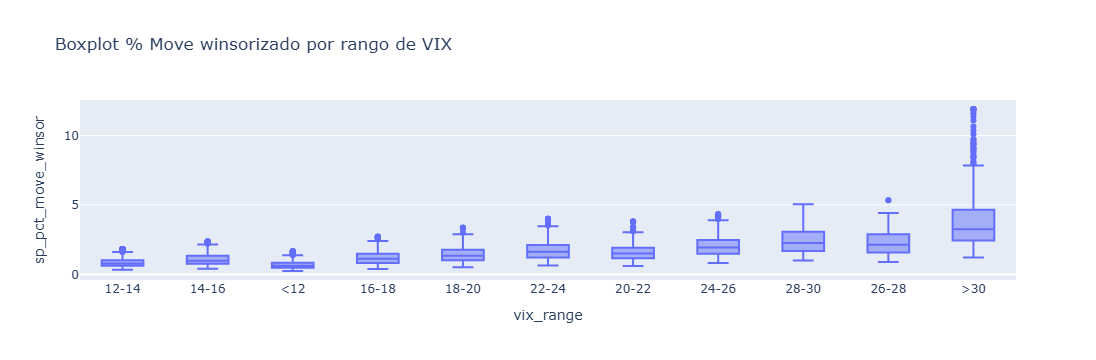

In [46]:
import plotly.express as px

fig = px.box(df, 
             x='vix_range', 
             y='sp_pct_move_winsor', 
             points='outliers', 
             title='Boxplot % Move winsorizado por rango de VIX')
fig.show()


In [50]:
#Hacemos esto para verificar que si halla habido algun cambio en los df
grupo = df[df['vix_range'] == '14-16']
print("Antes:", grupo['sp_pct_move'].describe())
print("Después:", grupo['sp_pct_move_winsor'].describe())

Antes: count    719.000000
mean       1.093003
std        0.452684
min        0.274926
25%        0.763559
50%        0.991848
75%        1.335028
max        4.388229
Name: sp_pct_move, dtype: float64
Después: count    719.000000
mean       1.088387
std        0.430186
min        0.408958
25%        0.763559
50%        0.991848
75%        1.335028
max        2.373496
Name: sp_pct_move_winsor, dtype: float64


In [52]:
# Estadísticas descriptivas con la columna normalizada
summary_stats_winsor = df.groupby('vix_range', observed=True)['sp_pct_move_winsor'] \
                         .agg(['mean', 'median', 'std']).reset_index()

summary_stats_winsor

,vix_range,mean,median,std
0,<12,0.687719,0.619451,0.287078
1,12-14,0.852802,0.790286,0.326022
2,14-16,1.088387,0.991848,0.430186
3,16-18,1.212802,1.123838,0.505953
4,18-20,1.423164,1.348009,0.559531
5,20-22,1.591081,1.505605,0.612312
6,22-24,1.742814,1.629241,0.705429
7,24-26,2.042085,1.928458,0.754646
8,26-28,2.267960,2.131211,0.837625
9,28-30,2.426781,2.262562,0.929275


In [54]:
# Renombrar columnas para claridad
summary_stats = df.groupby('vix_range', observed=True)['sp_pct_move'] \
                  .agg(['mean', 'median', 'std']).reset_index() \
                  .rename(columns={'mean': 'mean_orig', 'median': 'median_orig', 'std': 'std_orig'})

summary_stats_winsor = summary_stats_winsor.rename(columns={
    'mean': 'mean_winsor',
    'median': 'median_winsor',
    'std': 'std_winsor'
})

# Unir ambos resultados para comparar
comparison_stats = pd.merge(summary_stats, summary_stats_winsor, on='vix_range')
comparison_stats

,vix_range,mean_orig,median_orig,std_orig,mean_winsor,median_winsor,std_winsor
0,<12,0.689376,0.619451,0.295036,0.687719,0.619451,0.287078
1,12-14,0.854644,0.790286,0.335318,0.852802,0.790286,0.326022
2,14-16,1.093003,0.991848,0.452684,1.088387,0.991848,0.430186
3,16-18,1.218855,1.123838,0.545207,1.212802,1.123838,0.505953
4,18-20,1.425522,1.348009,0.571300,1.423164,1.348009,0.559531
5,20-22,1.590932,1.505605,0.614464,1.591081,1.505605,0.612312
6,22-24,1.747310,1.629241,0.729379,1.742814,1.629241,0.705429
7,24-26,2.052660,1.928458,0.802623,2.042085,1.928458,0.754646
8,26-28,2.271414,2.131211,0.853876,2.267960,2.131211,0.837625
9,28-30,2.431645,2.262562,0.945320,2.426781,2.262562,0.929275


In [56]:
import numpy as np
# ——————————————————————————————————————————————
# 1) Asume que tu DataFrame final se llama df_merged
#    y tiene las columnas:
#      - 'vix_range'   : categoría con los rangos de VIX
#      - 'sp_pct_move' : movimiento porcentual diario (valor absoluto)
# ——————————————————————————————————————————————

# 2) Define los umbrales de movimiento porcentual que quieras probar:
#    Aquí vamos de 0.25% en 0.25% hasta el máximo observado.
max_move = df['sp_pct_move'].max()
thresholds = np.arange(0.25, np.ceil(max_move * 4) / 4 + 0.25, 0.25)

# 3) Asegúrate de tener un orden para los bins de VIX
#    Si 'vix_range' es categorical con orden, úsalo:
if pd.api.types.is_categorical_dtype(df['vix_range']):
    vix_bins = df['vix_range'].cat.categories
else:
    vix_bins = sorted(df['vix_range'].unique(), key=lambda x: float(str(x).split('-')[0].lstrip('<>')))

# 4) Construye la tabla de probabilidad de excedencia
table = pd.DataFrame(index=thresholds, columns=vix_bins, dtype=float)

for vr in vix_bins:
    group = df[df['vix_range'] == vr]['sp_pct_move'].abs()
    # Para cada umbral, calcula la proporción de días en que mov ≥ umbral
    table[vr] = [(group >= t).mean() for t in thresholds]

# 5) Opcional: convertir a porcentaje (de 0–100)
table_pct = table * 100

# 6) Formatear índices y columnas para visualización
table_pct.index.name = '% movimiento SP500'
table_pct.columns.name = 'Rango de VIX'

# 7) Mostrar la tabla con 2 decimales
from IPython.display import display
display(table_pct.style.format("{:.2f}%"))


C:\Users\juana\AppData\Local\Temp\ipykernel_26188\1043295608.py:16: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



Rango de VIX,<12,12-14,14-16,16-18,18-20,20-22,22-24,24-26,26-28,28-30,>30
% movimiento SP500,,,,,,,,,,,
0.250000,98.85%,99.90%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%
0.500000,72.31%,89.57%,96.52%,96.04%,99.17%,99.74%,99.72%,100.00%,100.00%,100.00%,100.00%
0.750000,34.81%,56.24%,76.63%,81.89%,92.12%,96.32%,97.50%,99.62%,100.00%,100.00%,100.00%
1.000000,13.85%,26.71%,49.24%,60.12%,76.14%,84.74%,86.39%,95.38%,97.91%,99.17%,100.00%
1.250000,5.00%,12.18%,31.85%,41.40%,56.22%,69.74%,72.78%,88.08%,93.72%,91.74%,98.67%
1.500000,1.73%,5.36%,17.25%,23.90%,38.80%,51.05%,59.17%,73.85%,78.01%,83.47%,97.78%
1.750000,0.58%,2.34%,9.32%,14.46%,25.93%,31.58%,44.44%,58.46%,68.06%,73.55%,94.44%
2.000000,0.38%,0.39%,4.17%,7.76%,14.52%,20.79%,29.17%,47.31%,55.50%,63.64%,89.78%
2.250000,0.00%,0.19%,1.95%,4.72%,7.88%,11.84%,20.28%,33.46%,45.03%,51.24%,81.33%


## Explicación de la Construcción de la Tabla de Probabilidad de Excedencia

En este bloque de código hemos generado una **tabla de probabilidad de excedencia** para los movimientos porcentuales diarios del S&P 500, condicionada a distintos rangos de VIX. A continuación se describen sus pasos y objetivos:

1. **Definición de umbrales dinámicos**  
   Calculamos primero el valor máximo histórico de `sp_pct_move` y generamos una secuencia de umbrales que parte del 0.25 % y avanza de 0.25 % en 0.25 % hasta cubrir ese máximo. Esto nos permite evaluar de forma granular “¿qué probabilidad hay de que el índice se mueva al menos X %?” para cualquier X dentro de nuestro rango observado.

2. **Orden de los rangos de VIX**  
   Para asegurar coherencia en las columnas, obtenemos la lista de categorías de `vix_range` en el orden deseado (si la columna es categórica, usamos ese orden; si no, extraemos y ordenamos los valores).

3. **Cálculo de proporciones de excedencia**  
   Creamos un DataFrame vacío cuya **fila** corresponde a cada umbral de movimiento y cuya **columna** a cada rango de VIX. Luego, para cada rango `vr`, extraemos la serie de movimientos absolutos del S&P500 en esos días y, para cada umbral `t`, calculamos la proporción de observaciones que cumplen `(movimiento ≥ t)`. Este cociente es la **probabilidad empírica** de exceder ese umbral en ese régimen de volatilidad.

4. **Conversión a porcentaje**  
   Multiplicamos las proporciones por 100 para expresarlas como porcentajes, facilitando la lectura (“25 % de probabilidad”, en lugar de 0.25).

5. **Formateo y visualización**  
   Finalmente, asignamos nombres descriptivos a filas (`% movimiento SP500`) y columnas (`Rango de VIX`) y utilizamos el método `Styler` de Pandas para mostrar la tabla con dos decimales y el símbolo `%`.

---

### ¿Qué nos aporta esta tabla?

- **Perspectiva condicional de riesgo**: sabremos, por ejemplo, que en días con VIX entre 14–16 hay un 50 % de probabilidad de que el S&P 500 se mueva un 1 % o más, y solo un 10 % de probabilidad de superar el 2 %.  
- **Base para gestión dinámica de posiciones**: los umbrales de stop‑loss o los tamaños de posición pueden ajustarse automáticamente según el nivel de volatilidad.  
- **Insights de backtesting**: al incorporar estas probabilidades en la simulación, obtenemos estimaciones de riesgo y retorno más realistas, alineadas al “régimen de mercado” definido por el VIX.

Este análisis combina la **agregación agrupada** (por rangos de VIX) con la **estimación empírica de colas** de la distribución de rendimientos, una práctica común en finanzas cuantitativas para medir riesgos y diseñar estrategias robustas.
